# **McDonalds Case Study** : Nakshatiraa K N

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [8]:
# Step 1: Load the dataset
url = 'https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv'
df = pd.read_csv(url)

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [9]:
# Step 2: Explore categorical variables
print(df.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [10]:
# Information about our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [11]:
# Find categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [ ]:
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())

Value counts for yummy:
yummy
Yes    803
No     650
Name: count, dtype: int64
Value counts for convenient:
convenient
Yes    1319
No      134
Name: count, dtype: int64
Value counts for spicy:
spicy
No     1317
Yes     136
Name: count, dtype: int64
Value counts for fattening:
fattening
Yes    1260
No      193
Name: count, dtype: int64
Value counts for greasy:
greasy
Yes    765
No     688
Name: count, dtype: int64
Value counts for fast:
fast
Yes    1308
No      145
Name: count, dtype: int64
Value counts for cheap:
cheap
Yes    870
No     583
Name: count, dtype: int64
Value counts for tasty:
tasty
Yes    936
No     517
Name: count, dtype: int64
Value counts for expensive:
expensive
No     933
Yes    520
Name: count, dtype: int64
Value counts for healthy:
healthy
No     1164
Yes     289
Name: count, dtype: int64
Value counts for disgusting:
disgusting
No     1100
Yes     353
Name: count, dtype: int64
Value counts for Like:
Like
+3              229
+2              187
0               169
+4

In [12]:
# Converting categorical columns to numerical
df['yummy'] = df['yummy'].replace({'Yes':1 , 'No':0})
df['convenient'] = df['convenient'].replace({'Yes':1 , 'No':0})
df['spicy'] = df['spicy'].replace({'Yes':1 , 'No':0})
df['fattening'] = df['fattening'].replace({'Yes':1 , 'No':0})
df['greasy'] = df['greasy'].replace({'Yes':1 , 'No':0})
df['fast'] = df['fast'].replace({'Yes':1 , 'No':0})
df['cheap'] = df['cheap'].replace({'Yes':1 , 'No':0})
df['tasty'] = df['tasty'].replace({'Yes':1 , 'No':0})
df['expensive'] = df['expensive'].replace({'Yes':1 , 'No':0})
df['healthy'] = df['healthy'].replace({'Yes':1 , 'No':0})
df['disgusting'] = df['disgusting'].replace({'Yes':1 , 'No':0})
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [13]:

# Extracting the eleven columns from df
df1 = df.iloc[:,0:11]
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [14]:
yummy =print(((df1['yummy'].value_counts(normalize=True)*100)[1]))
convenient =print(((df1['convenient'].value_counts(normalize=True)*100)[1]))
spicy =print(((df1['spicy'].value_counts(normalize=True)*100)[1]))


55.26496902959395
90.77770130763938
9.359944941500343


The above result classifies McD as yummy,convenient,spicy

In [ ]:
num_consumers = data.shape[0]
num_variables = len(numeric_cols)


In [ ]:
print(f"Number of consumers: {num_consumers}")
print(f"Number of segmentation variables: {num_variables}")

Number of consumers: 1453
Number of segmentation variables: 15


In [ ]:
correlation_matrix = data[numeric_cols].corr()
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
                    yummy  convenient     spicy  fattening    greasy      fast  \
yummy           1.000000    0.253807  0.008742  -0.087027 -0.151853  0.106836   
convenient      0.253807    1.000000  0.028928   0.036451 -0.106948  0.243062   
spicy           0.008742    0.028928  1.000000  -0.041322  0.053932  0.020276   
fattening      -0.087027    0.036451 -0.041322   1.000000  0.319283  0.045600   
greasy         -0.151853   -0.106948  0.053932   0.319283  1.000000 -0.058212   
fast            0.106836    0.243062  0.020276   0.045600 -0.058212  1.000000   
cheap           0.105036    0.151574  0.017203  -0.026640 -0.073264  0.252133   
tasty           0.687280    0.289755  0.061154  -0.087561 -0.163536  0.145836   
expensive      -0.061727   -0.163961  0.045979   0.089134  0.147283 -0.201694   
healthy         0.247183    0.099230  0.106252  -0.338401 -0.211186  0.033596   
disgusting     -0.419852   -0.340797  0.032834   0.146054  0.321879 -0.137993   
Like   

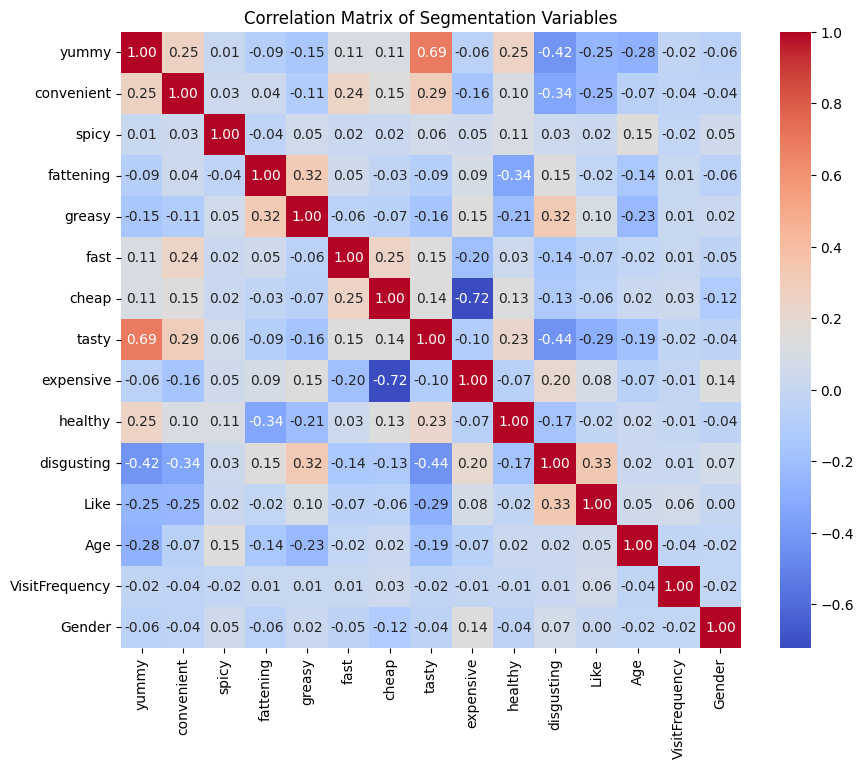

In [ ]:
# Plot the correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Segmentation Variables")
plt.show()


In [15]:

# Principal Component Analysis
pca = PCA(n_components=11)
principal_components = pca.fit_transform(df1)
pca_df = pd.DataFrame(data=principal_components,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [16]:
pca_df[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11']].std()


PCA1     0.757050
PCA2     0.607456
PCA3     0.504619
PCA4     0.398799
PCA5     0.337405
PCA6     0.310275
PCA7     0.289697
PCA8     0.275122
PCA9     0.265251
PCA10    0.248842
PCA11    0.236903
dtype: float64

<ipython-input-19-12d4c5d5cd49>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=pca_df, x='PCA1', y='PCA2',palette='deep')


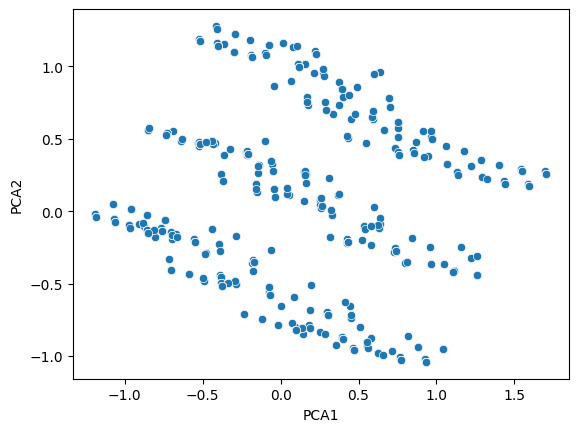

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2',palette='deep')
plt.show()



In [21]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [22]:
# Using elbow method
wcss = []
for i in range(1,11):
  # init is used for initializing the centroid
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 10)
  kmeans.fit(df1)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

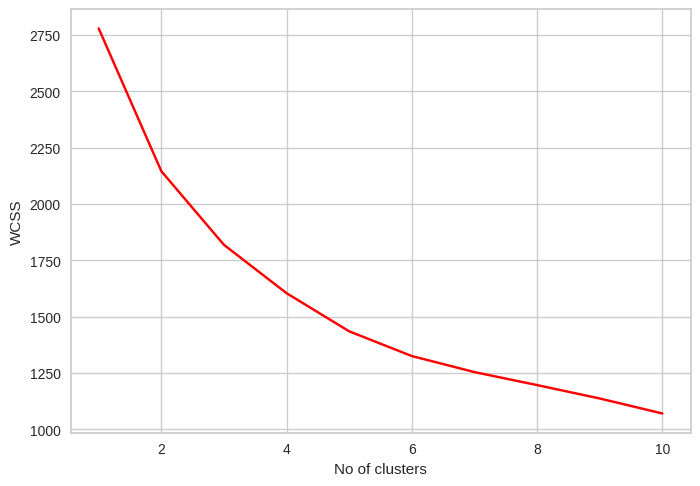

In [24]:
plt.plot(range(1,11),wcss,color='red')
plt.xlabel(range(1,11))
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

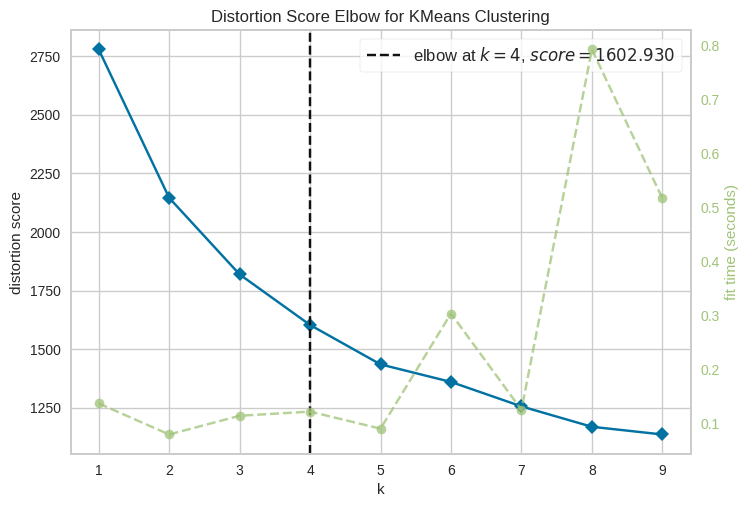

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
kmeans2 = KMeans()
visualizer = KElbowVisualizer(kmeans2, k=(1,10))
visualizer.fit(df1)
visualizer.show()

**Therefore K=4**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-30-dbf829e6fbc5>:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['yellow','red','green','blue','pink'])


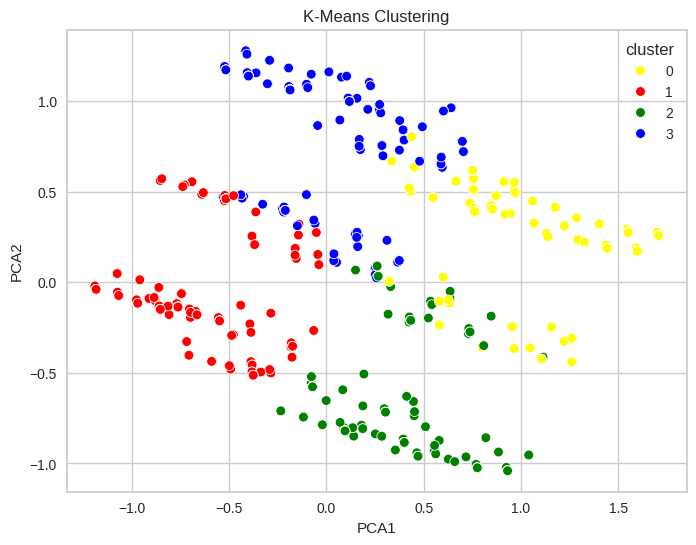

In [30]:
k_means_model = KMeans(4)
k_means_model.fit_predict(df1)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
plt.figure(figsize=(8,6))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['yellow','red','green','blue','pink'])
plt.title('K-Means Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


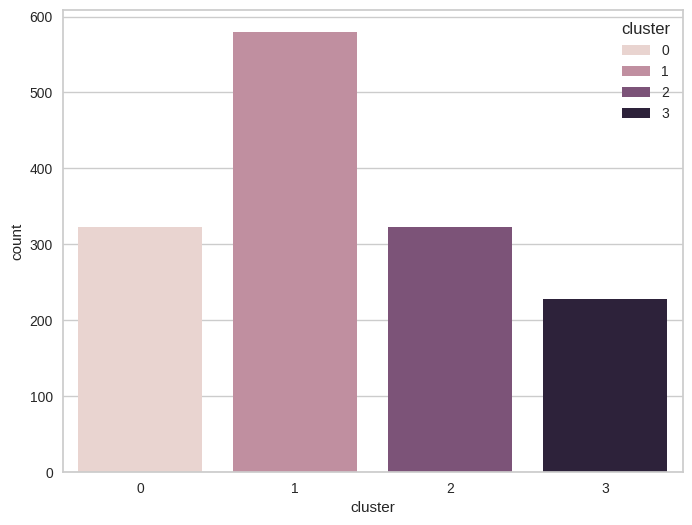

In [31]:
k_means_model = KMeans(4)
k_means_model.fit_predict(df1)
pca_df_kmeans1= pd.concat([df1,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
plt.figure(figsize=(8,6))
sns.countplot(x='cluster', data=pca_df_kmeans1, hue='cluster')
plt.show()


# Profiling Segments

**CLUSTER 1**

<ipython-input-32-8c0d4c7e38f9>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cluster1_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)


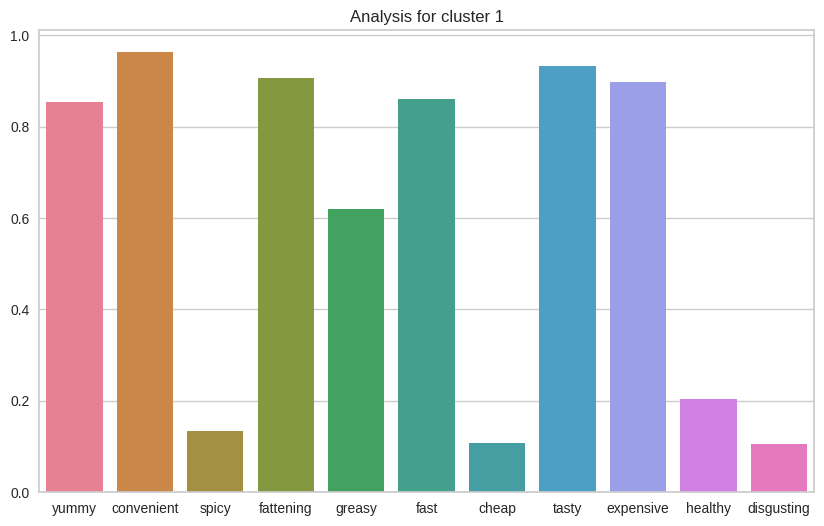

In [32]:
cluster1_analysis = pca_df_kmeans1[pca_df_kmeans1['cluster']==0]
plt.figure(figsize=(10,6))
sns.barplot(data=cluster1_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 1')
plt.show()


**CLUSTER 2**

<ipython-input-33-4f8b532a66be>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cluster1_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)


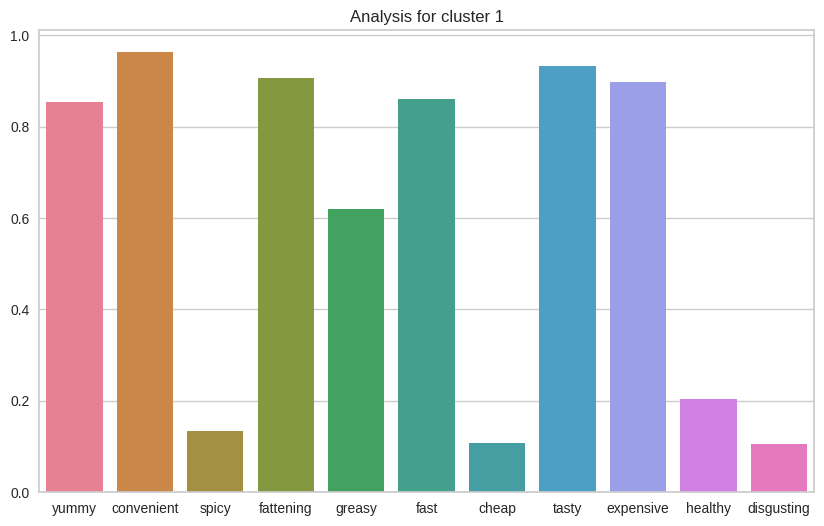

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(data=cluster1_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 1')
plt.show()

**CLUSTER 3**

<ipython-input-34-83efcda58990>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cluster3_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)


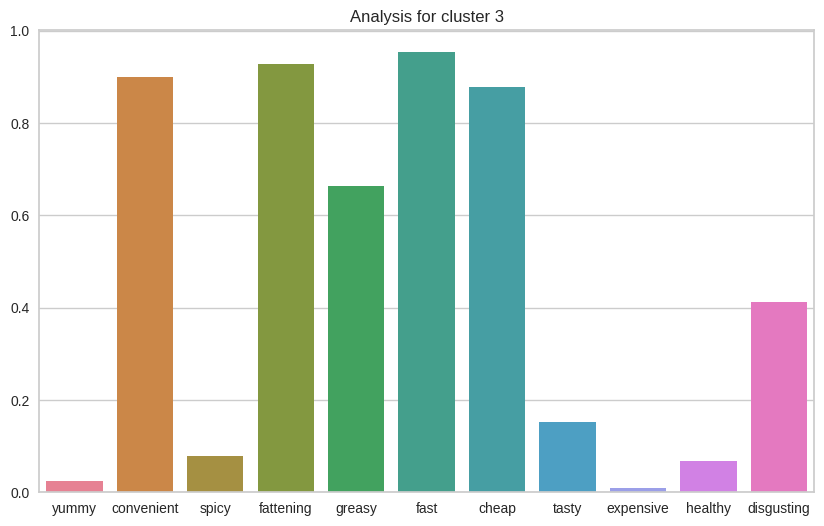

In [34]:
cluster3_analysis = pca_df_kmeans1[pca_df_kmeans1['cluster']==2]
plt.figure(figsize=(10,6))
sns.barplot(data=cluster3_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 3')
plt.show()

**CLUSTER 4**

<ipython-input-35-0adb431a2195>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cluster4_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)


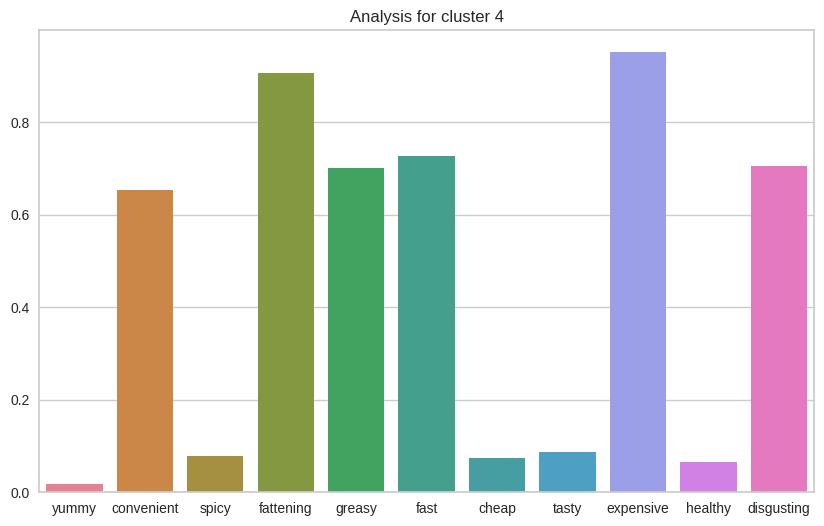

In [35]:
cluster4_analysis = pca_df_kmeans1[pca_df_kmeans1['cluster']==3]
plt.figure(figsize=(10,6))
sns.barplot(data=cluster4_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 4')
plt.show()

# Describing Segments

In [36]:
df= pd.concat([df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)

In [37]:
df['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [38]:
df['Like'] = df['Like'].replace({'I hate it!-5':0 ,'-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})
df.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
1448,0,1,0,1,1,0,0,0,1,0,1,0,47,Once a year,Male,3
1449,1,1,0,1,0,0,1,1,0,1,0,7,36,Once a week,Female,1
1450,1,1,0,1,0,1,0,1,1,0,0,8,52,Once a month,Female,0
1451,1,1,0,0,0,1,1,1,0,1,0,9,41,Every three months,Male,1
1452,0,1,0,1,1,0,0,0,1,0,1,2,30,Every three months,Male,3


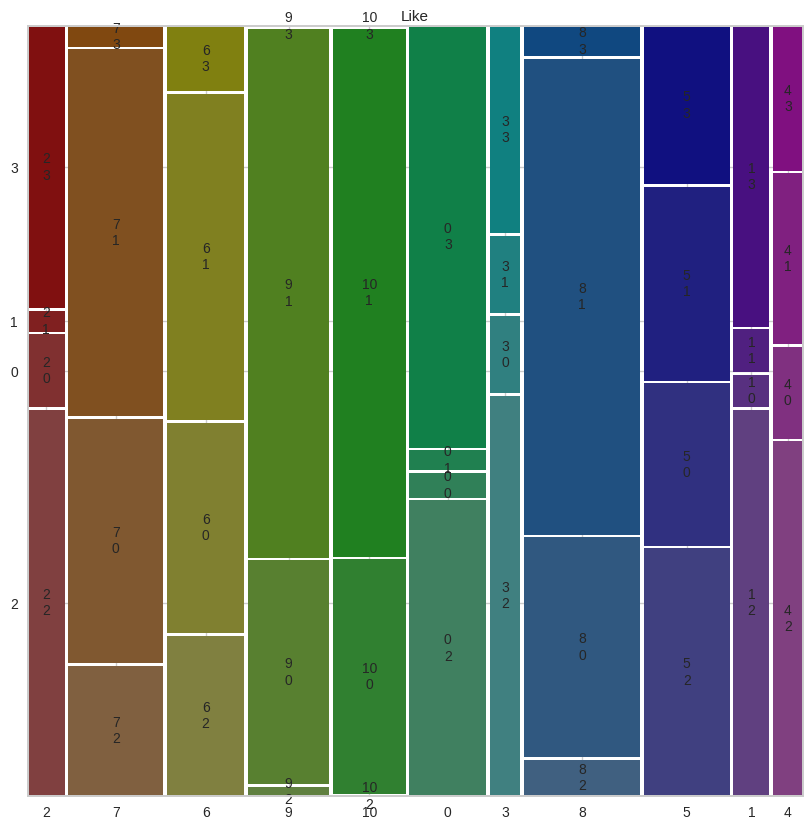

In [39]:
plt.rcParams['figure.figsize']=(10,10)
mosaic(df,['Like','cluster'])
plt.xlabel('Like')
plt.show()



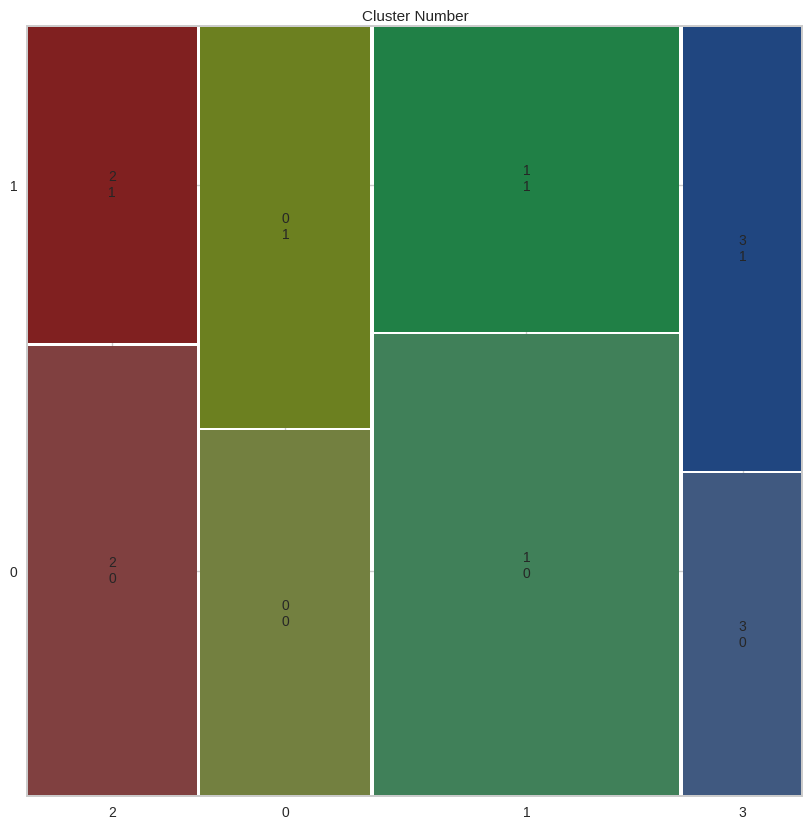

In [40]:
df['Gender'] = df['Gender'].replace({'Female':0, 'Male':1})
mosaic(df,['cluster','Gender'])
plt.xlabel('Cluster Number')
plt.show()

<ipython-input-42-0a009d15fb44>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['cluster'], y=df['Age'],palette='Set3')


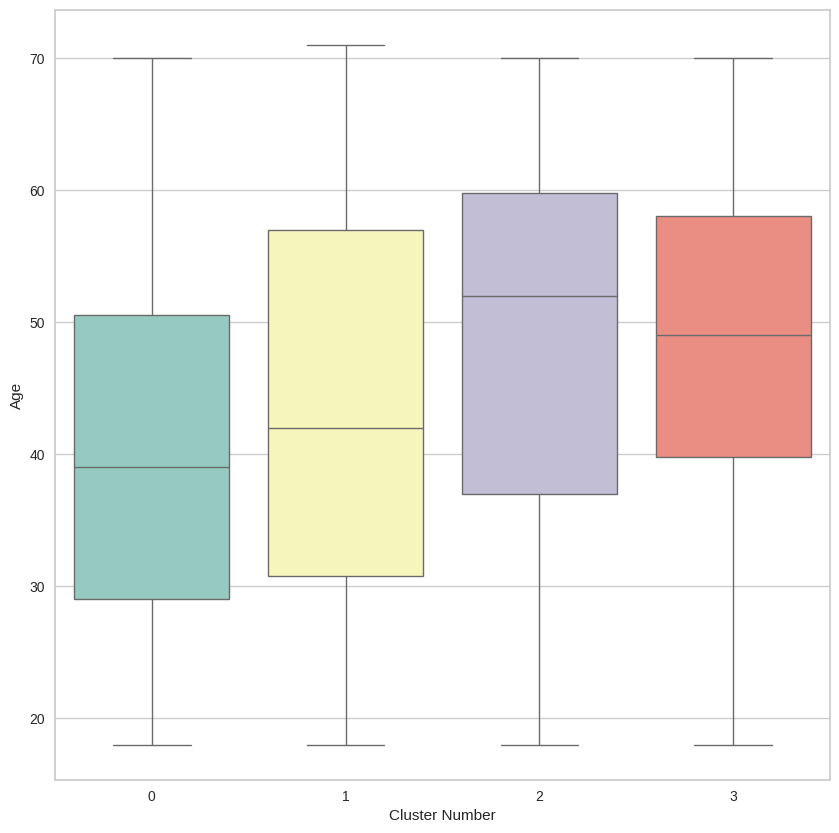

In [42]:
sns.boxplot(x=df['cluster'], y=df['Age'],palette='Set3')
plt.xlabel('Cluster Number')
plt.show()


In [43]:
df['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [44]:
df['VisitFrequency'] = df['VisitFrequency'].replace({'Never':0, 'Once a week':1, 'More than once a week':2, 'Once a month':3, 'Every three months':4, 'Once a year':5})
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,4,0,2
1,1,1,0,1,1,1,1,1,1,0,0,7,51,4,0,0
2,0,1,1,1,1,1,0,1,1,1,0,6,62,4,0,0
3,1,1,0,1,1,1,1,1,0,0,1,9,69,1,0,1
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,2


In [45]:
X = df.iloc[:,0:15]
Y = df.iloc[:,15]

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
print(X_train.shape)
print(X_test.shape)

(1017, 15)
(436, 15)


In [47]:
dc = DecisionTreeClassifier(random_state=1234)
model = dc.fit(X, Y)

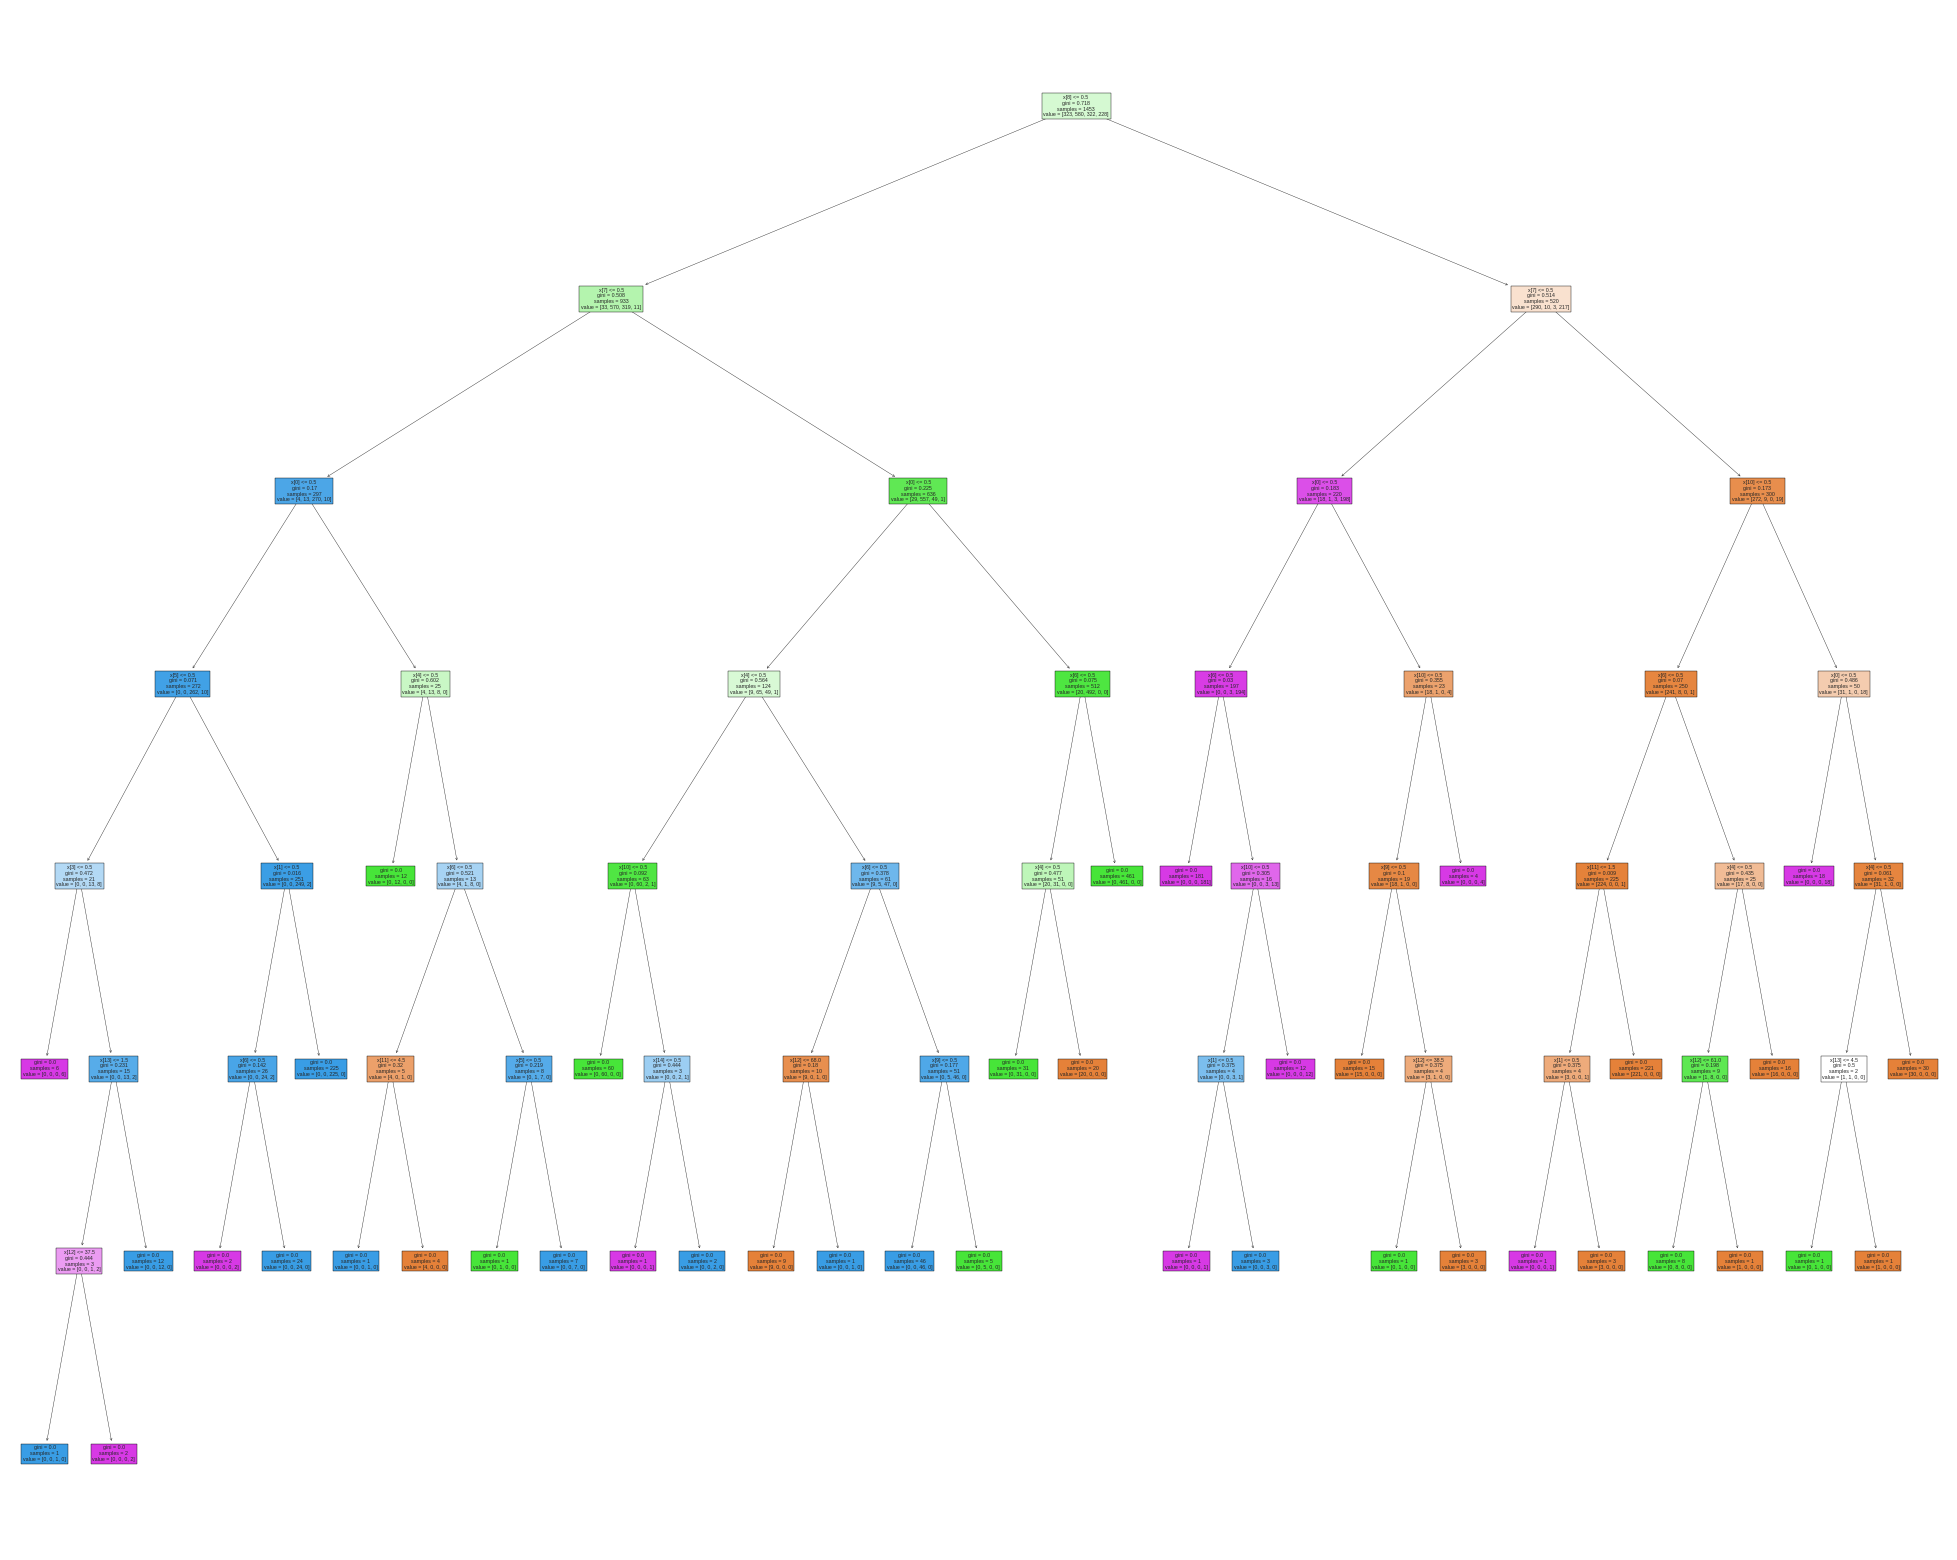

In [49]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dc, filled=True)
fig.savefig('decision_tree.png')
